In [34]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [36]:
from tensorflow.keras.datasets import mnist

In [37]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [38]:
x_train.shape

(60000, 28, 28)

In [39]:
single_image = x_train[0]

In [40]:
single_image.shape

(28, 28)

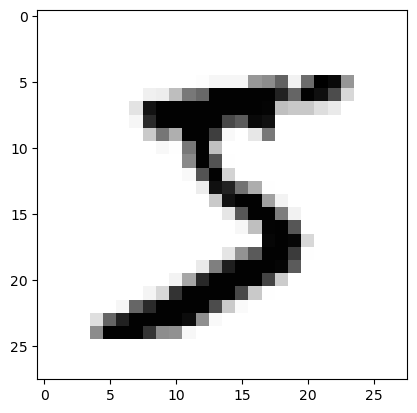

In [41]:
plt.imshow(single_image,cmap="Greys")

In [42]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [43]:
from tensorflow.keras.utils import to_categorical

In [44]:
y_train.shape

(60000,)

In [45]:
y_example = to_categorical(y_train)

In [46]:
y_example.shape

(60000, 10)

In [47]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [48]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [49]:
y_cat_train = to_categorical(y_train,10)

In [50]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [51]:
x_train = x_train/255

In [52]:
x_test = x_test/255

In [53]:
scaled_image = x_train[0]

In [54]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

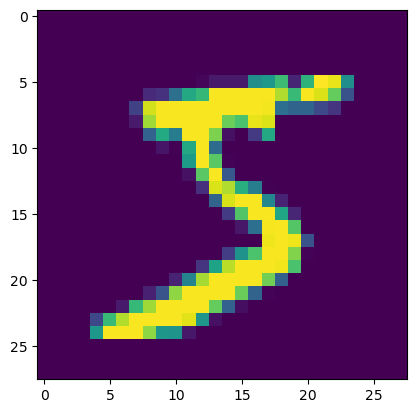

In [55]:
plt.imshow(scaled_image)

In [56]:
x_train.shape

(60000, 28, 28)

In [57]:
#batch_size,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)

In [58]:
x_test = x_test.reshape(10000,28,28,1)

In [59]:
from tensorflow.keras.models import Sequential

In [60]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [61]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

#output layer
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop = EarlyStopping(monitor="val_loss",patience=1)

In [64]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9161 - loss: 0.2808 - val_accuracy: 0.9800 - val_loss: 0.0609
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9853 - loss: 0.0504 - val_accuracy: 0.9831 - val_loss: 0.0500
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9899 - loss: 0.0322 - val_accuracy: 0.9861 - val_loss: 0.0402
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0205 - val_accuracy: 0.9874 - val_loss: 0.0389
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9955 - loss: 0.0136 - val_accuracy: 0.9841 - val_loss: 0.0532


In [65]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

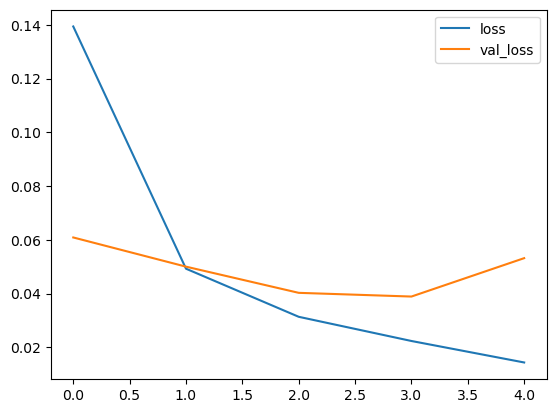

In [66]:
metrics[["loss","val_loss"]].plot()

<Axes: >

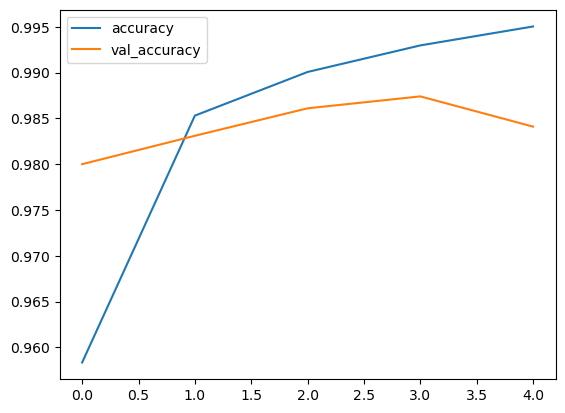

In [67]:
metrics[["accuracy","val_accuracy"]].plot()

In [68]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.9798 - loss: 0.0683


[0.053161393851041794, 0.9840999841690063]

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
preds_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


In [71]:
predictions = np.argmax(preds_prob, axis=1)

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.96      0.99      0.97      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [73]:
confusion_matrix(y_test,predictions)

array([[ 973,    0,    1,    0,    1,    2,    0,    2,    1,    0],
       [   1, 1122,    1,    3,    0,    0,    1,    1,    4,    2],
       [   0,    1, 1006,    1,    1,    0,    2,   20,    1,    0],
       [   0,    0,    0, 1001,    0,    4,    0,    2,    2,    1],
       [   0,    0,    0,    0,  969,    0,    0,    0,    0,   13],
       [   2,    0,    0,   10,    0,  878,    1,    0,    0,    1],
       [   4,    1,    0,    0,    4,    3,  942,    0,    4,    0],
       [   0,    1,    3,    3,    0,    0,    0, 1014,    1,    6],
       [   3,    0,    1,    2,    0,    0,    0,    4,  963,    1],
       [   0,    0,    1,    0,    9,    2,    0,   15,    9,  973]])

In [74]:
my_number = x_test[0]

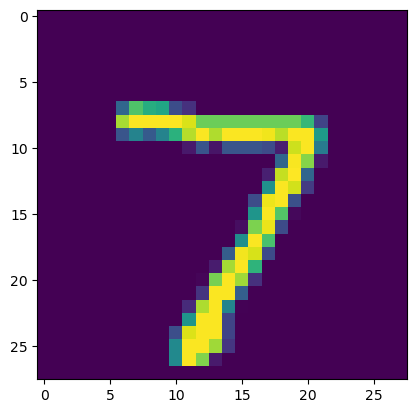

In [75]:
plt.imshow(my_number.reshape(28,28))

In [76]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([7])

In [120]:
secondnumber = x_test[1]

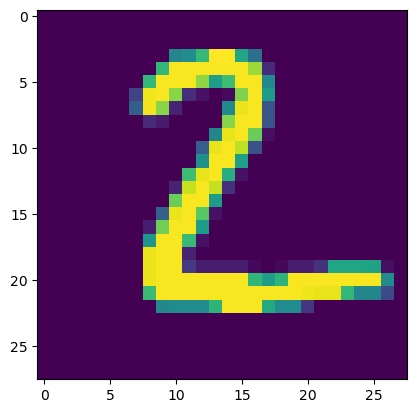

In [122]:
plt.imshow(secondnumber.reshape(28,28))

In [124]:
np.argmax(model.predict(secondnumber.reshape(1,28,28,1)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([2])